<a href="https://colab.research.google.com/github/SabrineChahed/Assembly_from_Scratch/blob/main/Celiac_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**Project Statement**





##***Project Scope and Aim***



The current project aims to investigating pertinent  features that affects Celiac Health Risk predicting whether or not a patient is more likely to have Celiac disease.





The dataset used contains 14 features and 2206 records.

##***The medical variables used:***

- **Age**
- **Gender**
- **Diabetes:** yes, no
- **Diabetes Type:** Type 1, Type 2, none
- **Diarrhoea:** fatty, watery, inflammatory
- **Abdominal:** yes, no
- **Short Stature:**PSS, Variant, DSS
- **Sticky Stool:** yes, no
- **Weight Loss:** yes, no
- **Marsh:**indicates level of number of lymphocytes among cells on the surface of the intestinal lining: IELs (IntraEpithelial Lymphocytes): marsh type 0, marsh type 3a, marsh type 1, marsh type 2, marsh type 3b, none, marsh type 3c
- **cd_type:** potential, atypical, latent, silent, typical, none


The antibodies:
- **IgA**
- **IgG**
- **IgM**







#**Project Approach**


We aim to predict how likely is a patient to have Celiac disease based on the previously seen features (Binary Classification).




#***1- A first look at Celiac Health Risk Dataset***

1.   ***Data Understanding***
2.   ***Data Preprocessing***
    * Handling Missing Values
    * Hot Encoding
    * Dataset Balancing


#***2-  Model Implementation***

1.    ***Random Forest***
2.    ***GridSearchCV for parameter fine-tunning***
3.    ***Feature Importance***





#***3- Model Testing***


#***4- Deployment***

#***5- Conclusions***





***Dataset reference:***
https://www.kaggle.com/datasets/jackwin07/celiac-disease-coeliac-disease/data



#**1- A first look at Celiac Health Risks Dataset**

## Library Imports
This cell imports various libraries necessary for data handling, model building, and data visualization.

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#**1.1 Data Understanding**


In [125]:
original_data = pd.read_csv('celiac_disease_lab_data.csv', sep=',', header=0)

In [ ]:
original_data.shape

(2206, 15)

In [ ]:
original_data.head(5)

,Age,Gender,Diabetes,Diabetes Type,Diarrhoea,Abdominal,Short_Stature,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Marsh,cd_type,Disease_Diagnose
0,10,Male,Yes,Type 1,inflammatory,yes,PSS,no,no,1.30,10.0,1.00,marsh type 0,potential,yes
1,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.50,12.5,1.30,marsh type 3a,atypical,yes
2,8,Female,Yes,Type 1,watery,yes,Variant,yes,yes,0.40,8.0,0.50,marsh type 1,latent,yes
3,10,Male,Yes,Type 1,watery,yes,PSS,no,no,0.98,9.0,0.66,marsh type 3a,silent,yes
4,9,Male,Yes,Type 1,fatty,yes,PSS,no,no,1.00,10.5,1.10,marsh type 1,latent,yes


In [ ]:
original_data.dtypes

Age                   int64
Gender               object
Diabetes             object
Diabetes Type        object
Diarrhoea            object
Abdominal            object
Short_Stature        object
Sticky_Stool         object
Weight_loss          object
IgA                 float64
IgG                 float64
IgM                 float64
Marsh                object
cd_type              object
Disease_Diagnose     object
dtype: object

In [ ]:
#what are the types of values in the field

print('Gender values are: ', original_data['Gender'].unique())
print('Diabetes values are', original_data['Diabetes'].unique())
print('Diabetes Type values are', original_data['Diabetes Type'].unique())
print('Diarrhoea values are: ', original_data['Diarrhoea'].unique())
print('Abdominal values are', original_data['Abdominal'].unique())
print('Short_Stature values are: ', original_data['Short_Stature'].unique())
print('Sticky_Stool values are: ', original_data['Sticky_Stool'].unique())
print('Weight_loss values are: ', original_data['Weight_loss'].unique())
print('Marsh values are: ', original_data['Marsh'].unique())
print('cd_type values are: ', original_data['cd_type'].unique())
print('Disease_Diagnose values are: ', original_data['Disease_Diagnose'].unique())

Gender values are:  ['Male' 'Female']
Diabetes values are ['Yes' 'no']
Diabetes Type values are ['Type 1' nan 'Type 2']
Diarrhoea values are:  ['inflammatory' 'fatty ' 'watery']
Abdominal values are ['yes' 'no']
Short_Stature values are:  ['PSS' 'Variant ' 'DSS']
Sticky_Stool values are:  ['no' 'yes']
Weight_loss values are:  ['no' 'yes']
Marsh values are:  ['marsh type 0' 'marsh type 3a' 'marsh type 1' 'marsh type 2'
 'marsh type 3b' 'none' 'marsh type 3c']
cd_type values are:  ['potential' 'atypical' 'latent' 'silent' 'typical' 'none']
Disease_Diagnose values are:  ['yes' 'no']


In [126]:
#how many null values are there
original_data.isnull().sum()

Age                   0
Gender                0
Diabetes              0
Diabetes Type       418
Diarrhoea             0
Abdominal             0
Short_Stature         0
Sticky_Stool          0
Weight_loss           0
IgA                   0
IgG                   0
IgM                   0
Marsh                 0
cd_type               0
Disease_Diagnose      0
dtype: int64

In [127]:
# check for data balancy
original_data['Disease_Diagnose'].value_counts()

Disease_Diagnose
yes    1843
no      363
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Disease_Diagnose'>

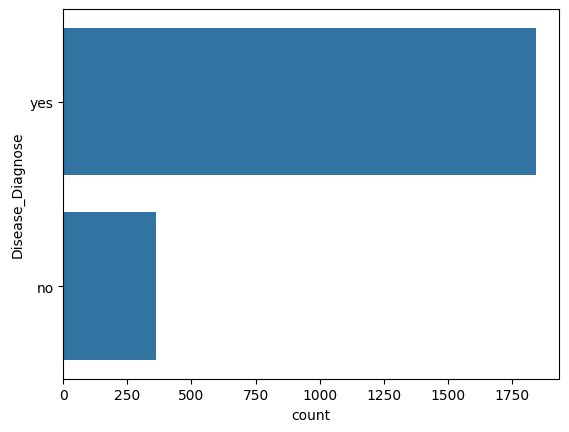

In [128]:
sns.countplot(original_data['Disease_Diagnose'])

We notice that the dataset is imbalanced, it has to be balaneced!

#**1.2 Data Preprocessing**

#**1.2.1 Handling Missing Value**


In [129]:
original_data = original_data.fillna('none')

In [130]:
original_data.isnull().sum()

Age                 0
Gender              0
Diabetes            0
Diabetes Type       0
Diarrhoea           0
Abdominal           0
Short_Stature       0
Sticky_Stool        0
Weight_loss         0
IgA                 0
IgG                 0
IgM                 0
Marsh               0
cd_type             0
Disease_Diagnose    0
dtype: int64


#**1.2.2 Hot Encoding**


In [131]:
# Label Encoding for non-binary categorical variables
label_encoders = {}
for column in original_data.columns:
    if original_data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        original_data[column] = label_encoders[column].fit_transform(original_data[column])


In [132]:
original_data.dtypes

Age                   int64
Gender                int64
Diabetes              int64
Diabetes Type         int64
Diarrhoea             int64
Abdominal             int64
Short_Stature         int64
Sticky_Stool          int64
Weight_loss           int64
IgA                 float64
IgG                 float64
IgM                 float64
Marsh                 int64
cd_type               int64
Disease_Diagnose      int64
dtype: object

In [133]:
print('Gender values are: ', original_data['Gender'].unique())
print('Diabetes values are', original_data['Diabetes'].unique())
print('Diabetes Type values are', original_data['Diabetes Type'].unique())
print('Diarrhoea values are: ', original_data['Diarrhoea'].unique())
print('Abdominal values are', original_data['Abdominal'].unique())
print('Short_Stature values are: ', original_data['Short_Stature'].unique())
print('Sticky_Stool values are: ', original_data['Sticky_Stool'].unique())
print('Weight_loss values are: ', original_data['Weight_loss'].unique())
print('Marsh values are: ', original_data['Marsh'].unique())
print('cd_type values are: ', original_data['cd_type'].unique())
print('Disease_Diagnose values are: ', original_data['Disease_Diagnose'].unique())

Gender values are:  [1 0]
Diabetes values are [0 1]
Diabetes Type values are [0 2 1]
Diarrhoea values are:  [1 0 2]
Abdominal values are [1 0]
Short_Stature values are:  [1 2 0]
Sticky_Stool values are:  [0 1]
Weight_loss values are:  [0 1]
Marsh values are:  [0 3 1 2 4 6 5]
cd_type values are:  [3 0 1 4 5 2]
Disease_Diagnose values are:  [1 0]


In [134]:

for column_name, label_encoder in label_encoders.items():
    print(f"Column: {column_name}")
    numerical_labels = label_encoder.transform(label_encoder.classes_)
    original_values = label_encoder.inverse_transform(numerical_labels)
    for label, value in zip(numerical_labels, original_values):
        print(f"Numerical Label: {label}, Original Value: {value}")
    print()


Column: Gender
Numerical Label: 0, Original Value: Female
Numerical Label: 1, Original Value: Male

Column: Diabetes
Numerical Label: 0, Original Value: Yes
Numerical Label: 1, Original Value: no

Column: Diabetes Type
Numerical Label: 0, Original Value: Type 1
Numerical Label: 1, Original Value: Type 2
Numerical Label: 2, Original Value: none

Column: Diarrhoea
Numerical Label: 0, Original Value: fatty 
Numerical Label: 1, Original Value: inflammatory
Numerical Label: 2, Original Value: watery

Column: Abdominal
Numerical Label: 0, Original Value: no
Numerical Label: 1, Original Value: yes

Column: Short_Stature
Numerical Label: 0, Original Value: DSS
Numerical Label: 1, Original Value: PSS
Numerical Label: 2, Original Value: Variant 

Column: Sticky_Stool
Numerical Label: 0, Original Value: no
Numerical Label: 1, Original Value: yes

Column: Weight_loss
Numerical Label: 0, Original Value: no
Numerical Label: 1, Original Value: yes

Column: Marsh
Numerical Label: 0, Original Value: ma

In [144]:
# Calculate the correlation between the target column 'Disease_Diagnose' and all other numeric features
original_data.corr()['Disease_Diagnose'].sort_values()

Diabetes           -0.776148
Diabetes Type      -0.692714
Marsh              -0.635683
IgA                -0.247044
Gender             -0.057161
IgM                -0.025956
Diarrhoea          -0.018160
cd_type             0.086576
IgG                 0.114605
Age                 0.141312
Short_Stature       0.166427
Weight_loss         0.295459
Sticky_Stool        0.342643
Abdominal           0.384605
Disease_Diagnose    1.000000
Name: Disease_Diagnose, dtype: float64

#**1.2.3 Balancing Dataset**


The positive Celiac cases are five times the number of the Negative Celiac cases. Building a model on such imbalanced dataset produces biased results, hence, it's of supreme importance to balance the dataset for good model performance.

***Balancing Our Datast: Upsampling***

In [145]:
#original_data['Disease_Diagnose'].value_counts()

df_majority = original_data[(original_data['Disease_Diagnose']==1)]
df_minority = original_data[(original_data['Disease_Diagnose']==0)]

In [136]:
df_minority.shape

(363, 15)

In [146]:
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 1843, # to match majority class
                                 random_state=42)  # reproducible results


In [138]:
df_minority_upsampled.shape

(1843, 15)

In [139]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [141]:
df_upsampled['Disease_Diagnose'].value_counts()

Disease_Diagnose
0    1843
1    1843
Name: count, dtype: int64

In [ ]:
df_upsampled.head(5)

,Age,Gender,Diabetes,Diabetes Type,Diarrhoea,Abdominal,Short_Stature,Sticky_Stool,Weight_loss,IgA,IgG,IgM,Marsh,cd_type,Disease_Diagnose
754,14,1,1,2,2,1,0,1,0,9.0,12.0,1.7,6,2,0
2148,7,1,1,2,1,0,2,1,0,1.0,5.0,1.2,6,2,0
1691,3,1,0,0,1,1,2,1,1,1.0,9.0,1.4,6,2,0
803,8,0,0,0,2,1,2,1,1,0.8,9.5,1.2,2,5,0
553,12,1,1,2,1,0,2,1,1,0.6,12.0,1.0,6,2,0


#***2- Modeling Using Random Forest***

# ***2.1 Grid Search Methodology***
- Systematic exploration of multiple hyperparameter combinations.
- Identifies optimal values through exhaustive search.

## Data Splitting
This cell splits the dataset into training and testing sets to evaluate the model's performance.


*   Training_valdiation set 70% of data.
*   Test set 30% of data.

In [147]:

X = df_upsampled.drop(columns=['Disease_Diagnose'])
y = df_upsampled['Disease_Diagnose']

# Splitting the dataset into train and test sets with a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [148]:
# check for data balancy (y_train)
y_train.value_counts()

Disease_Diagnose
0    1290
1    1290
Name: count, dtype: int64

In [ ]:
print ("X_train :", X_train.shape )
print ("y_train :", y_train.shape )

X_train : (2580, 14)
y_train : (2580,)


In [150]:
param_grid = {
    'n_estimators': [5 ],  # the number of trees in the forest
    'max_depth': [10],  # the maximum depth of each tree is usually 0 to avoid overfitting
    'max_features': ['sqrt'],  # the number of features to consider at each split
    'min_samples_split': [50],  # the minimum number of samples required to split a node
    'min_samples_leaf': [50],  # the minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # whether to use bootstrap samples when building trees
    'criterion': ['gini', 'entropy'],  # the function to measure the quality of a split
}

## Setting Up Grid Search for Decision Tree

Initializes a `DecisionTreeClassifier` and configures `GridSearchCV` with:
- The decision tree classifier (`clf`) as the estimator.
- A parameter grid (`param_grid`) to explore.
- 4-fold cross-validation (`cv=4`).
- f1 score as the scoring metric.
- Try to change the scoring metric.

In [151]:
# Create an instance of the RandomForestClassifier class
rf = RandomForestClassifier()

# Create an instance of the GridSearchCV class
grid_search_rf = GridSearchCV(estimator= rf ,
                              param_grid= param_grid,
                              cv=4,
                              scoring='f1',
                              n_jobs=-1,
                              verbose=2)

#***3- Model Testing***

## Executing Grid Search

Runs `grid_search.fit` on the training data (`X_train`, `y_train`) to find the optimal hyperparameter settings based on the defined grid.

In [152]:

# Fit the grid search object to the data
grid_search_rf.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'max_depth': [10],
                         'max_features': ['sqrt'], 'min_samples_leaf': [50],
                         'min_samples_split': [50], 'n_estimators': [5]},
             scoring='f1', verbose=2)

## Retrieving Best Model Parameters from Grid Search

- Extracts `best_params` from `grid_search`, revealing the optimal hyperparameter settings.
- Assigns `best_model` as the best estimator found by grid search.
- Prints `best_params` to display the selected hyperparameters for the best model.

In [153]:
# Best RF parameters:
best_model_rf = grid_search_rf.best_estimator_

best_params_rf = grid_search_rf.best_params_
print("Best RF parameters:", best_params_rf)

Best RF parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 5}


In [154]:
# Predict on test set

y_pred = grid_search_rf.best_estimator_.predict(X_test)


In [155]:
# Concatenate X_train and y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Concatenate X_test and y_test
test_data = pd.concat([X_test, y_test], axis=1)

In [156]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n", cm)

# Generate a classification report
cr = classification_report(y_test, y_pred)
print("\n Classification report: \n", cr)

Accuracy: 0.9864376130198915

Confusion matrix: 
 [[538  15]
 [  0 553]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       553
           1       0.97      1.00      0.99       553

    accuracy                           0.99      1106
   macro avg       0.99      0.99      0.99      1106
weighted avg       0.99      0.99      0.99      1106



#***- Correlation***

In [157]:
# Calculate correlation matrix
correlation_matrix = train_data.corr()

In [158]:
# Extract correlation of features with the target variable (excluding target variable itself)
target_correlation = correlation_matrix.iloc[:-1, -1]

In [160]:
# Print the correlation of all features with the target variable
target_correlation_sorted = target_correlation.sort_values()
target_correlation_sorted


Marsh           -0.806378
Diabetes        -0.803649
Diabetes Type   -0.766160
IgA             -0.212582
Gender          -0.100620
IgM             -0.036856
Diarrhoea       -0.018339
IgG              0.147420
cd_type          0.159880
Short_Stature    0.172591
Age              0.217440
Weight_loss      0.357335
Sticky_Stool     0.363490
Abdominal        0.443563
Name: Disease_Diagnose, dtype: float64

<Axes: >

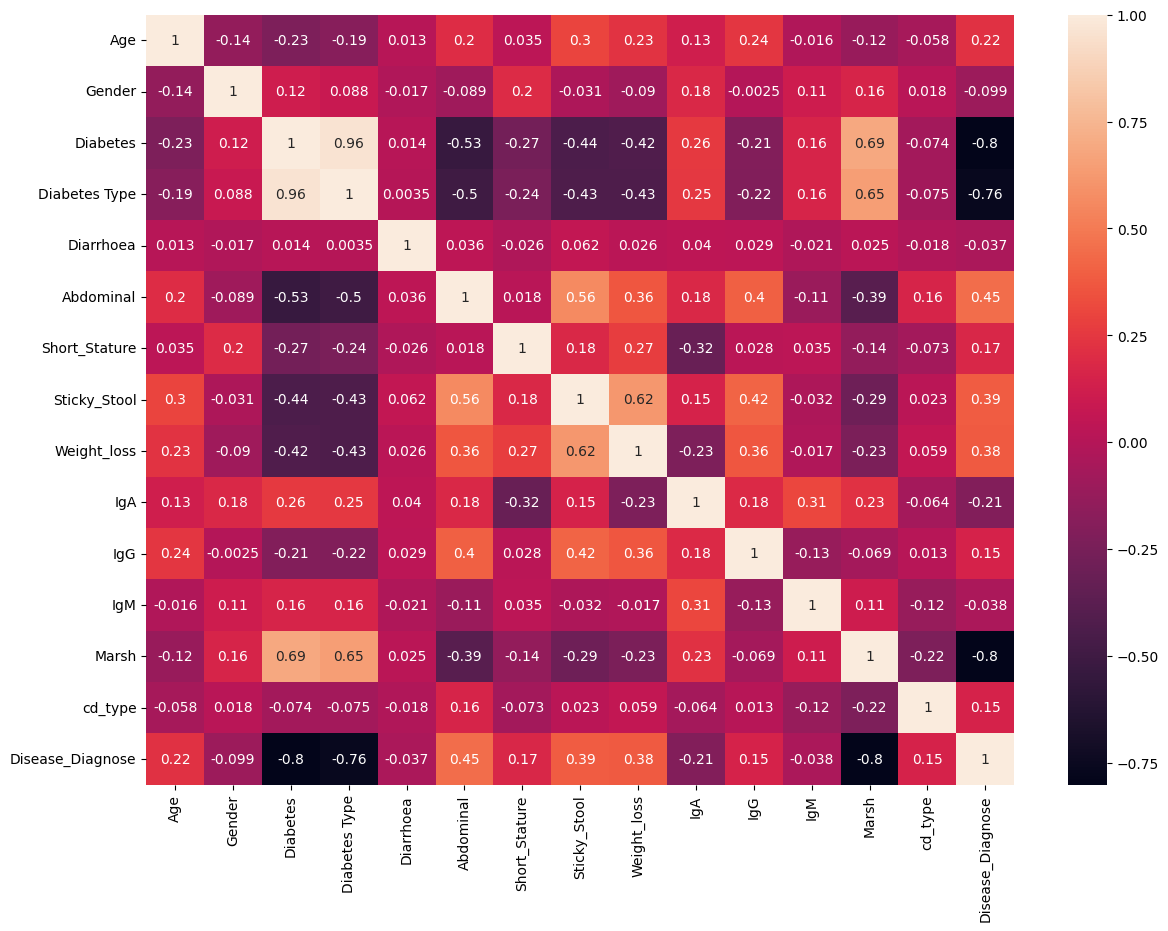

In [161]:
# width, height
plt.figure(figsize=(14,10))
sns.heatmap(df_upsampled.corr(), annot=True)